In [13]:
from sklearn import linear_model as lm
import numpy as np
import datetime as dt
from DataGeneration import DataGeneration
from sensors.sensor import Sensor
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from pmdarima import auto_arima
from sensors.Cleanser import cleanser

data = DataGeneration(9, 30, 2, dt.datetime(2024, 2, 7))

X, Y = data.get_time_series()

sensor = Sensor("Temperature Sensor", "Measures Temperature", X, Y)

cleanse = cleanser(sensor, 2)

cleanse.replace_missing_values()
cleanse.set_data_types_to_float()

[40.0,
 40.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 290.0,
 290.0,
 220.0,
 220.0,
 0.0,
 0.0,
 310.0,
 310.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 40.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 120.0,
 120.0,
 60.0,
 60.0,
 40.0,
 40.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 130.0,
 130.0,
 130.0,
 130.0,
 110.0,
 110.0,
 150.0,
 150.0,
 180.0,
 180.0,
 130.0,
 130.0,
 150.0,
 150.0,
 150.0,
 150.0,
 170.0,
 170.0,
 150.0,
 150.0,
 160.0,
 160.0,
 160.0,
 160.0,
 140.0,
 140.0,
 150.0,
 150.0,
 170.0,
 170.0,
 220.0,
 220.0,
 210.0,
 210.0,
 999.0,
 999.0,
 180.0,
 180.0,
 190.0,
 190.0,
 180.0,
 180.0,
 180.0,
 180.0,
 200.0,
 200.0,
 210.0,
 210.0,
 210.0,
 210.0,
 210.0,
 210.0,
 220.0,
 220.0,
 180.0,
 180.0,
 210.0,
 210.0,
 200.0,
 200.0,
 210.0,
 

In [14]:
class DataPrediction:
    def __init__(self, sensor, prediction_end_date):
        
        self.X = sensor.get_date_range()
        self.prediction_intervals = self.X[-1] - self.X[-2]
        self.prediction_start_date = self.X[-1] + self.prediction_intervals
        self.prediction_end_date = prediction_end_date

        self.Y = sensor.get_value()

        self.X_future = None
        self.forcasted_values = None

        self.model = None

    
    def set_prediction_timeframe(self):

        current_date = self.prediction_start_date

        future_dates = [current_date]

        while current_date + self.prediction_intervals <= self.prediction_end_date:
            current_date += self.prediction_intervals
            future_dates.append(current_date)

        print(future_dates)
        self.X_future = future_dates

    def predict(self):

        predictions = self.model.forecast(steps=len(self.X_future))

        self.forcasted_values = predictions.to_list()

    def train_model(self):

        df = pd.DataFrame(data=self.Y, index=self.X, columns=['Value'])

        auto_arima_model = auto_arima(df, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore", max_order=None, trace=True)

        best_order = auto_arima_model.order

        model = ARIMA(df, order=best_order)

        fitted_model = model.fit()

        self.model = fitted_model


[datetime.datetime(2024, 3, 17, 16, 30), datetime.datetime(2024, 3, 17, 17, 0), datetime.datetime(2024, 3, 17, 17, 30), datetime.datetime(2024, 3, 17, 18, 0), datetime.datetime(2024, 3, 17, 18, 30), datetime.datetime(2024, 3, 17, 19, 0), datetime.datetime(2024, 3, 17, 19, 30), datetime.datetime(2024, 3, 17, 20, 0), datetime.datetime(2024, 3, 17, 20, 30), datetime.datetime(2024, 3, 17, 21, 0), datetime.datetime(2024, 3, 17, 21, 30), datetime.datetime(2024, 3, 17, 22, 0), datetime.datetime(2024, 3, 17, 22, 30), datetime.datetime(2024, 3, 17, 23, 0), datetime.datetime(2024, 3, 17, 23, 30), datetime.datetime(2024, 3, 18, 0, 0), datetime.datetime(2024, 3, 18, 0, 30), datetime.datetime(2024, 3, 18, 1, 0), datetime.datetime(2024, 3, 18, 1, 30), datetime.datetime(2024, 3, 18, 2, 0), datetime.datetime(2024, 3, 18, 2, 30), datetime.datetime(2024, 3, 18, 3, 0), datetime.datetime(2024, 3, 18, 3, 30), datetime.datetime(2024, 3, 18, 4, 0), datetime.datetime(2024, 3, 18, 4, 30), datetime.datetime(202

c:\Users\birdl\anaconda3\envs\course02502\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)
c:\Users\birdl\anaconda3\envs\course02502\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)
c:\Users\birdl\anaconda3\envs\course02502\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)


[232.81700616000956, 245.14908289982236, 243.84134243379975, 240.29934515703377, 236.97199468991818, 234.09872326474687, 231.49440416975384, 229.09351216280868, 226.8675627742577, 224.7999436264252, 222.87821337751154, 221.09171904310782, 219.4308344619309, 217.88669464105118, 216.45108338150453, 215.11636976358204, 213.87546156073054, 212.72176572059755, 211.64915277772812, 210.6519241186018, 209.7247816541944, 208.86279965650434, 208.06139858433264, 207.31632075162338, 206.6236077067736, 205.97957920202555, 205.38081364099526, 204.82412990039373, 204.30657042934263, 203.8253855364888, 203.37801878143642, 202.9620933928833, 202.575399641304, 202.2158830990928, 201.88163372579513, 201.57087572043957, 201.2819580870576, 201.0133458632678, 200.7636119653236, 200.53142960629881, 200.31556524713054, 200.11487204306957, 199.92828375072034, 199.75480906330034, 199.59352634402262, 199.44357872962146, 199.3041695780069, 199.17455823586246, 199.05405610370022, 198.9420229774676, 198.83786364726

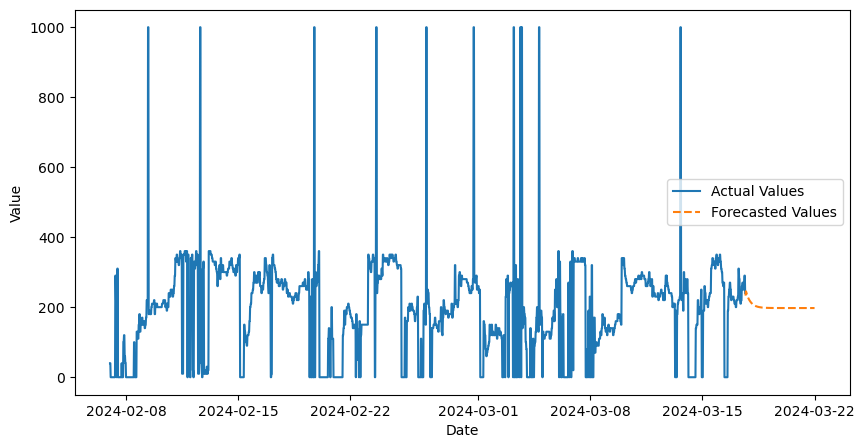

In [15]:
      
predict = DataPrediction(sensor, dt.datetime(2024, 3, 22))

predict.set_prediction_timeframe()
predict.train_model()
predict.predict()

sensor.set_forecast_values(predict.forcasted_values)
sensor.set_forecast_date_range(predict.X_future)

print(sensor.get_forecast_values())
print(sensor.get_forecast_date_range())

plt.figure(figsize=(10, 5))
plt.plot(sensor.get_date_range(), sensor.get_value(), label='Actual Values')
plt.plot(sensor.get_forecast_date_range(), sensor.get_forecast_values(), label='Forecasted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

